# МАДМО

<a href="https://mipt.ru/science/labs/laboratoriya-neyronnykh-sistem-i-glubokogo-obucheniya/"><img align="right" src="https://avatars1.githubusercontent.com/u/29918795?v=4&s=200" alt="DeepHackLab" style="position:relative;top:-40px;right:10px;height:100px;" /></a>



### Физтех-Школа Прикладной математики и информатики МФТИ 
### Лаборатория нейронных сетей и глубокого обучения (DeepHackLab)  
Домашнее задание необходимо загрузить в общий репозиторий с именной папкой 


## Домашнее задание 1
### Основы Python и пакет NumPy
---


In [3]:
import numpy as np
import random
import scipy.stats as sps

### Задача 1
В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета ***numpy*** и с ним.

In [ ]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((1000,1000))
b = np.random.sample((1000,1000))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
print(a.ndim)
print(b.ndim)
print(a.shape)
print(b.shape)
# ========
#print(a)
#print(b)

In [ ]:
def mult(a, b):
    # здесь напишите перемножение матриц без 
    # использования NumPy и выведите результат
    c=np.zeros((1000,1000))
    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(b)):
                c[i][j] += a[i][k]*b[k][j]
    return c
    pass

In [ ]:
def np_mult(a, b):
    # здесь напишите перемножение матриц с
    # использованием NumPy и выведите результат
    return a.dot(b)
    pass

In [ ]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

In [ ]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

### Задача 2
Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.  
Аналогично -- с помощью библиотеки **NumPy** и без нее. Сравните скорость, объясните результат.

In [4]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    # Ваш код здесь
    return np.divide(np.cumsum(A),np.arange(1,len(A)+1,1))
    pass

In [5]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    Sm=0
    for i in range(len(A)):
        # Ваш код здесь
        Sm+=A[i]
        S[i]=Sm/(i+1)
    return S

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 7) 

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:
np.abs(S1 - S2).sum()

CPU times: user 212 ms, sys: 56 ms, total: 268 ms
Wall time: 135 ms
CPU times: user 5 s, sys: 108 ms, total: 5.1 s
Wall time: 5.05 s


0.0

### Задача 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все элементы с четными индексами исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив X с преобразованным X и вывести в обратном порядке. 

In [6]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    Y=np.full(X.shape, a)
    Y[::2]=np.power(Y[::2], 3)
    return Y

In [7]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X):
    # Ваш код здесь
    Y=np.full(X.shape, 1)
    return Y

In [8]:
X = sps.uniform.rvs(size=10 ** 7) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)
# проверим корректность:
np.abs(S1 - S2).sum()

CPU times: user 132 ms, sys: 28 ms, total: 160 ms
Wall time: 81.3 ms
CPU times: user 204 ms, sys: 28 ms, total: 232 ms
Wall time: 122 ms


0

Почему методы ***numpy*** оказываются эффективнее?

In [9]:
numpy обрабатывает наборы данных внутри скомпилированных в машинный код процедур, python - это всего лишь скрипт

SyntaxError: invalid syntax (<ipython-input-9-efbc7bcb03cb>, line 1)

## Дополнительные задачи

Дополнительные задачи подразумевают, что Вы самостоятельно разберётесь в некоторых функциях ***numpy***, чтобы их сделать.  

Эти задачи не являются обязательными, но могут повлиять на Ваш рейтинг в лучшую сторону (точные правила учёта доп. задач будут оглашены позже).

### Задача 4*

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***), и подать такую сетку на вход функции отрисовки.

In [13]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.outer(np.sin(x), np.cos(y))

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), cmap='inferno')
    plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

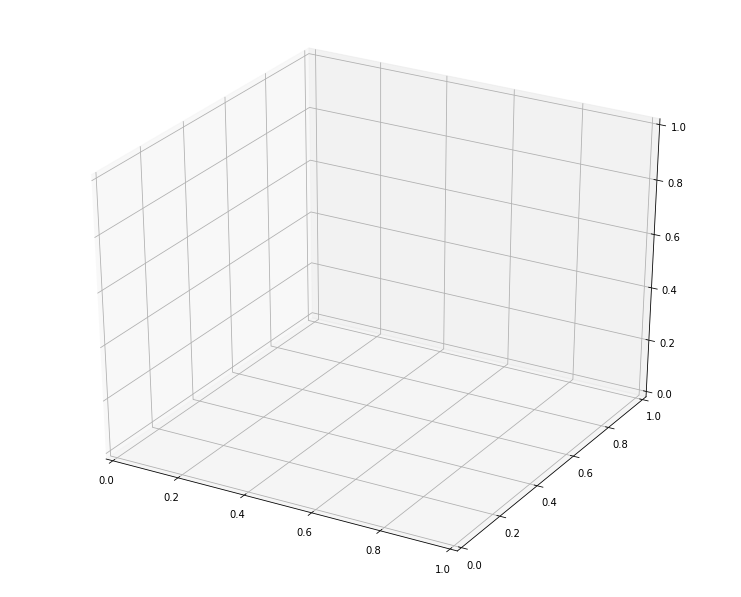

In [14]:
grid_x, grid_y = np.meshgrid(np.linspace(0, np.pi*2), np.linspace(0, np.pi*2))# Ваш код здесь

draw_f(grid_x, grid_y) 

### Задача 5*

Вам дана картинка. При загрузке её размерность равна 3: **(w, h, num_channels)**, где **w** - ширина картинки в пикселях, **h** - высота картинки в пикселях, **num_channels** - количество каналов *(R, G, B, alpha)*.

Вам нужно "развернуть" картинку в одномерный массив размера w \* h \* num_channels, написав **одну строку кода**.

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
path_to_image = './image.png'
image_array = plt.imread(path_to_image)
plt.imshow(image_array);

In [ ]:
flat_image_array = # Ваш код здесь

In [ ]:
# здесь выведите размер нового массива